In [1]:
# !pip install azure
# !pip install azure-cognitiveservices-vision-customvision
# !pip install wheel
# !pip install pandas
# !pip install -U scikit-learn scipy matplotlib
# !pip install pillow 

In [1]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy

In [2]:
from msrest.authentication import ApiKeyCredentials

In [3]:
# project_id_class = '1fe808f3-6c59-4d13-9df4-f5d5e58e2515'
# prediction_key = '85446ae44aad4c2c99231dde5e63b7b0'

# ENDPOINT = 'https://southeastasia.api.cognitive.microsoft.com/'
# credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
# predictor = CustomVisionPredictionClient(endpoint=ENDPOINT, credentials=credentials)

In [4]:
# detection_key = '85446ae44aad4c2c99231dde5e63b7b0'
# project_id_detection = '6bbb8a36-3679-4c50-a193-3c1f692eeb50'
# # detector = CustomVisionPredictionClient(detection_key, endpoint=ENDPOINT)
# credentials = ApiKeyCredentials(in_headers={"Prediction-key": detection_key})
# detector = CustomVisionPredictionClient(ENDPOINT, credentials)

In [4]:
project_id_class = '078885e0-7037-4038-8d2e-7916abeff39b'
prediction_key = 'b5427b2f991840d7aca82b9843a5f43a'

ENDPOINT = 'https://southeastasia.api.cognitive.microsoft.com/'
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(endpoint=ENDPOINT, credentials=credentials)

In [5]:
detection_key = 'b5427b2f991840d7aca82b9843a5f43a'
project_id_detection = '6bbb8a36-3679-4c50-a193-3c1f692eeb50'
# detector = CustomVisionPredictionClient(detection_key, endpoint=ENDPOINT)
credentials = ApiKeyCredentials(in_headers={"Prediction-key": detection_key})
detector = CustomVisionPredictionClient(ENDPOINT, credentials)

In [6]:
pred = list()
act = list()
doll_preds = list()
problems = list()
corrects = list()

In [7]:
path = '/media/tohn/SSD/ImageFromAzureDB_IsanCohort'

In [8]:
import cv2

im = cv2.imread('/media/tohn/SSD/ImageFromAzureDB_IsanCohort/12150_1.jpg')

print(type(im))

print(im.shape)
print(type(im.shape))

<class 'numpy.ndarray'>
(600, 800, 3)
<class 'tuple'>


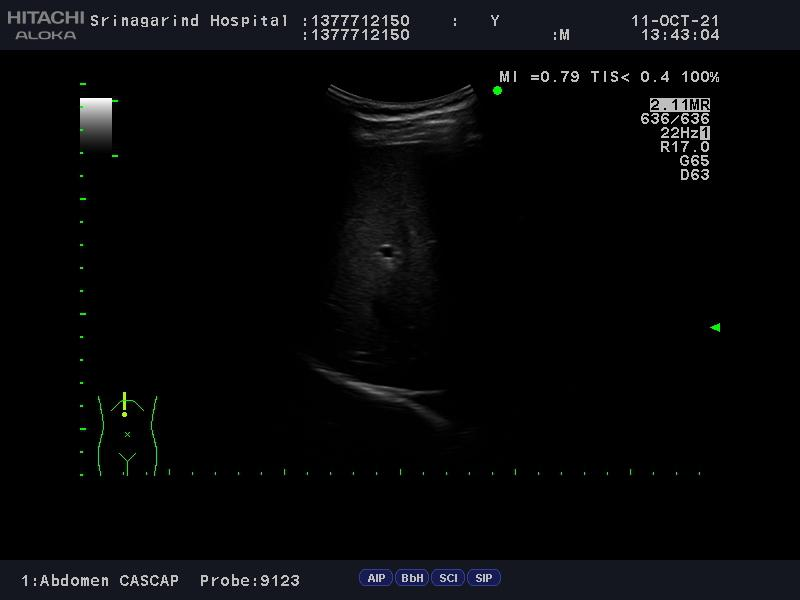

In [9]:
from IPython.display import Image
os.chdir('/media/tohn/SSD/ImageFromAzureDB_IsanCohort')
resize = Image(filename = '12150_1.jpg')
resize
# os.chdir('/media/tohn/HDD/VISION_dataset/USAI/ABNORMAL JULY 2020/AB1/resize')
# resize.save('/resize/img.jpg')

In [10]:
# !mkdir croped

In [11]:
#updated
def find_largest_box(list_of_boxes):
    l = 1000000
    r = -1000000
    u = 1000000
    d = -1000000
    for b in list_of_boxes:
        if b['left'] < l:
            l = b['left']
        if b['right'] > r:
            r = b['right']
        if b['up'] < u:
            u = b['up']
        if b['down'] > d:
            d = b['down']
    box = {'up':u,'down':d,'left':l,'right':r}
    return box

In [12]:
filen_ =[]

In [15]:
Opath = os.path.join(path) #path ใช้ได้
Spath = os.path.join('/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cropped_Iteration7')

if not os.path.exists(Spath):
    os.mkdir(Spath)

allfiles = os.listdir(Opath)
for filen in allfiles:
    top_prob = list()
    top_pred = list()
    if 'jpg' in filen:

        #Detect fan
        if not os.path.exists(os.path.join(Spath,filen)):
            with open(os.path.join(Opath,filen), mode="rb") as test_data:
                results = detector.detect_image(project_id_detection, 'Iteration7', test_data) 
            res = list()
            res_conf = list()
            conf = False
            for prediction in results.predictions:
                if prediction.probability > 0.50:
                    res.append({'prop':prediction.probability ,'left':prediction.bounding_box.left,'up':prediction.bounding_box.top,'right':prediction.bounding_box.left+prediction.bounding_box.width,'down':prediction.bounding_box.top+prediction.bounding_box.height})
                if prediction.probability > 0.80:
                    conf = True
                    res_conf.append({'prop':prediction.probability ,'left':prediction.bounding_box.left,'up':prediction.bounding_box.top,'right':prediction.bounding_box.left+prediction.bounding_box.width,'down':prediction.bounding_box.top+prediction.bounding_box.height})

            im_res = cv2.imread(os.path.join(Opath,filen))
            
            try:
                if conf:
                    #use the most confidence box
                    img_in_mem = im_res[int(im_res.shape[0]*res_conf[0]['up']):int(im_res.shape[0]*res_conf[0]['down']),int(im_res.shape[1]*res_conf[0]['left']):int(im_res.shape[1]*res_conf[0]['right'])]
                    cv2.imwrite(os.path.join(Spath,filen),img_in_mem)
                else:
                    #use the largest box that cover every box
                    box = find_largest_box(res)
                    img_in_mem = im_res[int(im_res.shape[0]*box['up']):int(im_res.shape[0]*box['down']),int(im_res.shape[1]*box['left']):int(im_res.shape[1]*box['right'])]
                    cv2.imwrite(os.path.join(Spath,filen),img_in_mem)
            except:
                print(filen)
                filen_.append(filen)
                print(prediction.probability)

12248_1.jpg
0.005116799


In [17]:
import os
os.chdir( '/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cropped_Iteration7')

In [19]:
import glob
filename = glob.glob('*') #*.jpg
print(len(filename))

812


# เก็บรูปที่ มันcropไม่ดี

In [20]:
print(len(filen_))

1


In [21]:
filen_

['12248_1.jpg']

In [22]:
direc =[]
for i in filen_:
    a = '/media/tohn/SSD/ImageFromAzureDB_IsanCohort'+'/'+i
    direc.append(a)

In [24]:
import shutil, sys    

In [25]:
path_old = direc
path_new= '/media/tohn/SSD/ImageFromAzureDB_IsanCohort_cropped_Iteration7'
aa =[]
for i in range(len(path_old)):
    new_name = filen_[i]
    dst = os.path.join(path_new,new_name)
    if os.path.exists(dst):
        dst = dst+'cp.jpg'
    a = dst.split('/')[-1]
    aa.append(a)
#     dic["filename"].append(a)
    shutil.copyfile(path_old[i], dst)

In [26]:
len(aa)

1

In [27]:
import glob
filename = glob.glob('*') #*.jpg
print(len(filename))

813
